# Aircraft Risk Analysis For Aviation Industry

## Introduction

As the company plans to expand into the aviation industry, it is essential to make informed, data-driven decisions when selecting aircraft and planning operations. This project analyzes historical aviation accident data from the National Transportation Safety Board (NTSB), covering civil aviation accidents and incidents from 1962 to 2023.

The goal of this analysis is to identify lower-risk aircraft models and operational patterns using data cleaning, aggregation, and visualization. By carefully handling missing values and extracting key trends, we aim to uncover insights that will support sound business decision-making.



The final deliverable will include **three actionable business recommendations** based on data findings, enabling the company to approach this new venture with reduced risk and greater strategic clarity.

The procedure of the notebook
Data Overview

- Data Cleaning

- Exploratory Data Analysis (EDA)

- Insights and Visualizations

- Business Recommendations

- Conclusion




## Part 1: Interacting with Pandas DataFrames

In this project, we will work with aviation accident data collected by the National Transportation Safety Board (NTSB).

The dataset contains records of civil aviation accidents and selected incidents from 1962 to 2023, covering various features such as aircraft types, accident causes, locations, and outcomes. 
For additional information about the dataset, please refer to the [NTSB website](https://www.ntsb.gov/).


In [131]:
# Always start by importing pandas
import pandas as pd

Read 'dataset_aviationData.csv' from the data foldeer into the notebook as a Pandas dataframe.

In [132]:
df = pd.read_csv('data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Looking at the first 5 rows and the last 10 rows


In [133]:
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [134]:
df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


The information for each column in the dataframe


In [135]:
# Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [136]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

(88889, 31)

Check missing values per column

In [137]:
#Check missing values
df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [138]:
# Missing values based on percentages
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data

,Missing Values,Percentage
Event.Id,0,0.000000
Investigation.Type,0,0.000000
Accident.Number,0,0.000000
Event.Date,0,0.000000
Location,52,0.058500
Country,226,0.254250
Latitude,54507,61.320298
Longitude,54516,61.330423
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324


### Critical Columns with 0 missing values:

- Event.Id

- Investigation.Type

- Accident.Number

- Event.Date

 
### Moderate Missing (a few hundred to a few thousand):

- Location (52 missing)

 - Country (226 missing)

- Registration.Number,
- Make, 
- Model, 
- Amateur.
- Built, 
- Weather.Condition, etc.

For the analysis I will work with the following variables: 
- Event.Id
- Investigation.Type
-  Event.Date
-  Location / Country
-  Injury.Severity
-  Aircraft.damage
- Aircraft.Category
-  Make / Model
-  Amateur.Built
-  Number.of.Engines
-  Engine.Type
-  Purpose.of.flight
- Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured
- Weather.Condition
- Broad.phase.of.flight



In [139]:
# List of the columns you want to keep
columns_to_keep = [
    'Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
    'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
    'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
    'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'
]

# Keep only those columns
df = df[columns_to_keep]
df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [140]:
# Check that only the expected columns remain
assert list(df.columns) == columns_to_keep, "Error: Unexpected columns found!"

#### Handling the missing values in the chosen variable using dropna and fillna

In [141]:
df = df.copy()

# Drop rows missing critical information
df = df.dropna(subset=['Investigation.Type', 'Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model'])

# Fill missing values for less critical columns
df['Location'] = df['Location'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')
df['Amateur.Built'] = df['Amateur.Built'].fillna('Unknown')
df['Number.of.Engines'] = df['Number.of.Engines'].fillna('Unknown')
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

# Fill injury numbers with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)

df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,PIPER,PA42,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,Unknown


In [142]:
def clean_aviation_data(df):
    """
    Cleans the Aviation dataset by:
    - Selecting important columns
    - Making a copy to avoid SettingWithCopyWarning
    - Filling missing values appropriately
    """
    # Select only the columns you want
    selected_columns = [
        'Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
        'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
        'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
        'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'
    ]
    
    df = df[selected_columns].copy()  # Make a copy to work safely

    # Fill missing values for categorical columns with 'Unknown'
    categorical_cols = [
        'Location', 'Country', 'Aircraft.Category', 'Amateur.Built',
        'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
        'Weather.Condition', 'Broad.phase.of.flight'
    ]
    for col in categorical_cols:
        df[col] = df[col].fillna('Unknown')

    # Fill missing values for injury counts with 0
    injury_cols = [
        'Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Total.Minor.Injuries', 'Total.Uninjured'
    ]
    for col in injury_cols:
        df[col] = df[col].fillna(0)

    return df

In [143]:
df = clean_aviation_data(df)
df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,PIPER,PA42,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,Unknown


### The data is now clean and the important variables already filtered. Now, I can visualize the data

In [144]:
# Make a copy of cleaned data

df_cleaned = df.copy()

# Save to CSV
df_cleaned.to_csv('data/aviation_data_cleaned.csv', index=False)

### 1. Distribution of injuries using barchart 


In [145]:
# Filter columns related to injuries
injury_columns = [col for col in df.columns if 'Injuries' in col]
print(injury_columns)

['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']


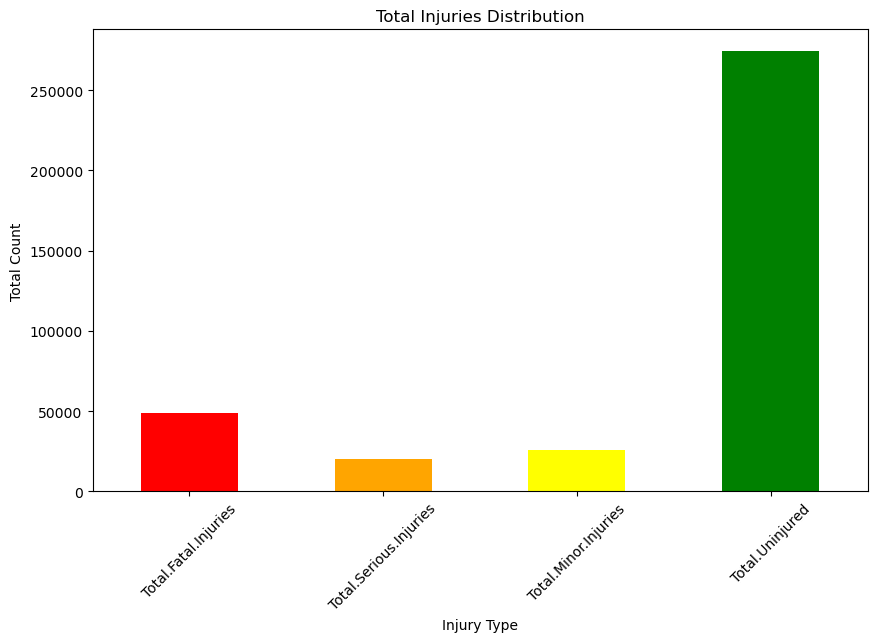

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of injuries
plt.figure(figsize=(10,6))
injuries_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injuries_columns].sum().plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('Total Injuries Distribution')
plt.ylabel('Total Count')
plt.xlabel('Injury Type')
plt.xticks(rotation=45)
plt.show()

### 2. Injury Severity Based on Aircraft Damage


In [ ]:
df['Make'] = df['Make'].str.lower()  # Converts all 'Make' values to lowercase
df['Make'] = df['Make'].str.strip().str.lower()  # Remove extra spaces and convert to lowercase

df['Make'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 15 Aircraft Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting Injury Severity by Aircraft Make (average injury severity per make)
# Plotting injury severity vs aircraft make/model (top 10)
plt.figure(figsize=(15,10))
sns.countplot(x='Make', hue='Injury.Severity', data=df)
plt.title('Injury Severity vs. Aircraft Make (Top 10)')
plt.xticks(rotation=45)
plt.show()